In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from   astropy.table import Table

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
from   vmaxer import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod, volcom
from   lumfn import lumfn
from   schechter import named_schechter

In [4]:
gama_zmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_zmax.fits')
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
218760,587725076066468464,140.76184403,0.88138861,19.285234,0.19148,4,G09_Y2_016_317,6,20.92196,19.863764,19.221165,18.91657,18.758524,658.2304679092451,39.09188990436649,G9,-427.8330938224349,349.4068458150677,8.49804217431823,0.6425991,0.48144473504871893,0,3,-0.08253885963365701,0.07861551115258505,0.11357102748632342,0.3017968172070399,0.4543733161142445,2.12,-0.1857356,-0.40593758,-19.734490882352347,-19.514288898304457,39.01972533364629,38.7995233495984,0.5147648,0.2469454249819889,0.0,-7.2852345,0.006675859535403247,0.0
514222,588010357995208988,140.43170714,2.70322146,18.915146,0.14678,4,G09_Y2_042_287,6,21.589085,19.783735,18.913113,18.392132,18.141521,490.20543377838897,38.45189060482602,G9,-329.1495629694051,271.98953125357735,20.16024784947387,0.87062263,0.7728269220198738,0,5,-0.05485153795869698,0.04294417490912461,0.17349867310879555,0.3710348496743173,0.6730864583221735,0.8,-0.1423766,-0.117424004,-19.567866802215363,-19.59281940013149,38.4830126762388,38.50796527415493,0.88485336,0.21070684751247823,0.0,-6.915146,0.0068939973687066405,0.0
136729,587724650329014562,175.98187034,-1.68652677,17.821947,0.10723,4,G12_Y1_BS1_111,6,20.750114,18.915552,17.888975,17.370033,16.957827,348.57500517451376,37.7114812124361,G12,-313.90729155002373,22.05035129652807,-9.26544554551312,1.026577,1.0076820215507178,0,6,-0.09325731567799292,-0.07436234137910137,0.14132080272041764,0.324264347557832,0.843633451012195,0.8,-0.1040131,-0.085784,-19.92684181711174,-19.945070914239654,37.748788914890056,37.76701801201797,1.9780521,0.2359721751024416,0.0,-5.821947,0.008105257160076889,0.0
8301,588848900987158689,181.68685894,0.7011761,17.671268,0.09026,4,G12_Y6_061_170,6,20.462242,18.581089,17.676947,17.264162,16.943651,289.90010408167615,37.31124185639019,G12,-265.7648322504193,-7.826708372577856,3.253957772909903,0.9041424,0.9274551055428526,0,6,-0.11610680033790788,-0.13941952612018324,0.11045695863690697,0.24497721963462613,0.769622118763023,0.8,-0.087552205,-0.072208,-19.662878147164204,-19.678222349682667,37.33414661029897,37.349490812817436,2.1287308,0.21495387626607787,0.0,-5.6712685,0.007175381374489338,0.0
660000,587729150915772570,140.29266091,-1.49659397,18.37324,0.19381,4,G09_Y4_215_048,6,20.901785,19.268467,18.358198,18.044136,17.891954,667.2133985674924,39.12132379475438,G9,-429.8204948973231,356.9368642006288,-14.596929953902679,0.9102688,0.7098572373522847,0,5,-0.02343535675875605,0.17697618945829519,0.20062064455143294,0.4817345989168716,0.6291548292038973,2.12,-0.1879957,-0.41087717,-20.760709220065625,-20.53782775391534,39.13394873727754,38.91106727112726,1.4267597,0.3705613147253278,0.0,-6.3732395,0.010676192095787577,0.0
345969,587726033301209510,131.84474743,1.97358773,19.54565,0.26095,4,G09_Y3_024_111,5,22.761194,21.052927,19.575912,19.074472,18.725279,935.2452451958234,39.85462754457326,G9,-494.50458449144605,552.2047314010108,25.54321579551912,1.4770145,0.9962657073577251,0,6,0.13130690507558437,0.612055739343836,0.36464012287634134,1.00882229587145,0.8328323686308681,0.8,-0.2531215,-0.20876001,-20.420495690024982,-20.464857177055965,39.96614617220271,40.0105076

In [5]:
gama_vmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.19148,0.03903000056743622,0.2469454249819889,-19.514288898304457,6349588.271497136,3052989.601898001
0.14678,0.03903000056743622,0.21070684751247823,-19.59281940013149,4027520.2496576104,1398944.305137531
0.10723,0.03903000056743622,0.2359721751024416,-19.945070914239654,5576424.763272431,541636.7082146929
0.09026,0.03903000056743622,0.21495387626607787,-19.678222349682667,4266038.2003806755,314971.8325214965
0.19381,0.03903000056743622,0.26298999786376953,-20.53782775391534,7594841.842906496,3162129.529927309
0.26095,0.03903000056743622,0.26298999786376953,-20.464857177055965,7594841.842906496,7428791.865532176
0.14096,0.03903000056743622,0.15787673253605988,-18.89293481444552,1735595.1283926105,1240338.4537762108
0.16247,0.03903000056743622,0.26298999786376953,-20.368130796655105,7594841.842906496,1888592.7487608716


Text(0.5, 0, 'ZMAX')

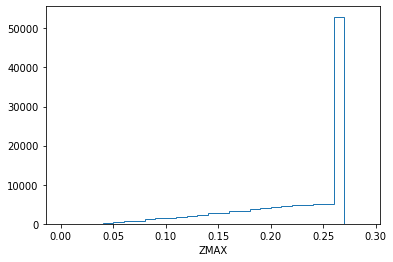

In [6]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [7]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03903   , 0.03981007])

Text(0, 0.5, 'ZMAX')

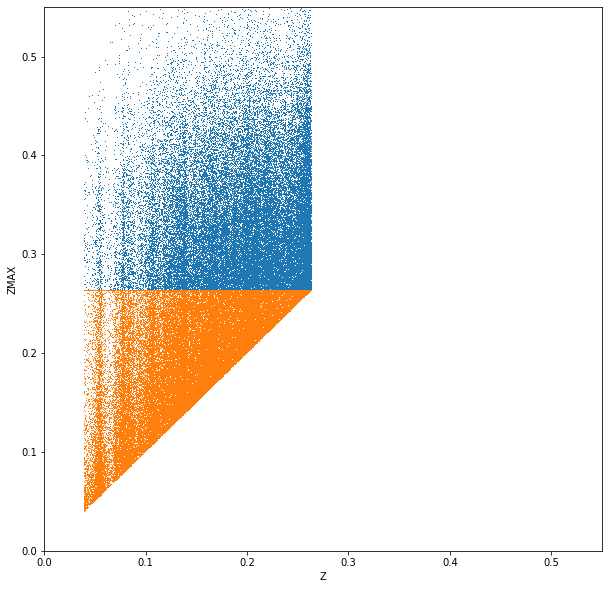

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZGAMA'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZGAMA'], gama_vmax['ZMAX'], marker=',', lw=0.0)
'''
ax.axvline(zmin, c='k', lw=0.5) 
ax.axvline(zmax, c='k', lw=0.5) 

ax.axhline(zmin, c='k', lw=0.5) 
ax.axhline(zmax, c='k', lw=0.5) 
'''
ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel('Z')
ax.set_ylabel('ZMAX')

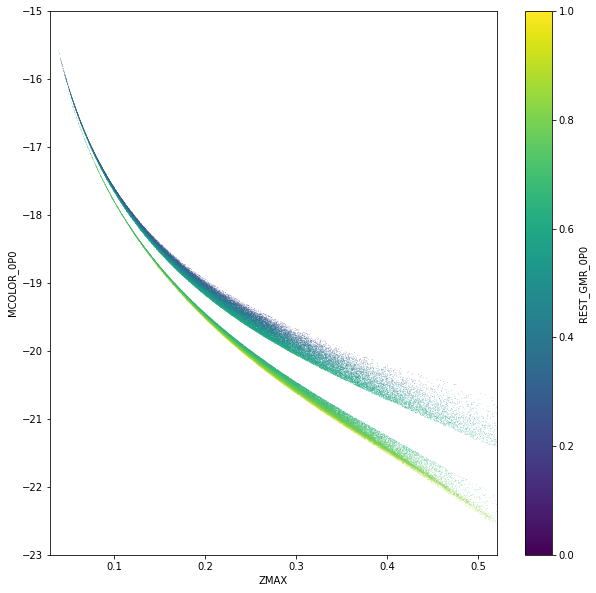

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc=ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)
# ax.plot(gama_vmax['ZMAX'], gama_vmax['MCOLOR_0P0'], marker=',', lw=0.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel('ZMAX')
ax.set_ylabel('MCOLOR_0P0')

plt.colorbar(sc, label='REST_GMR_0P0')

Text(0, 0.5, 'DEC')

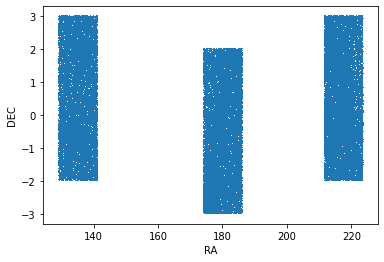

In [10]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlabel('RA')
pl.ylabel('DEC')

In [11]:
gama_lf = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_lumfn.fits')
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--


/tmp/ipykernel_6323/1547313978.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='No weights', alpha=0.4)
/tmp/ipykernel_6323/1547313978.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX')


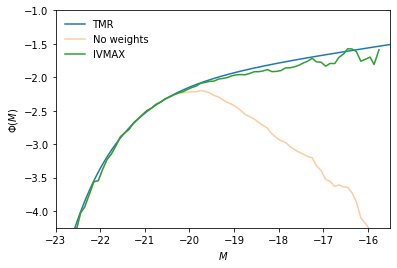

In [12]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR')

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='No weights', alpha=0.4)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX')

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)

Text(0.5, 0, '(V/VMAX)')

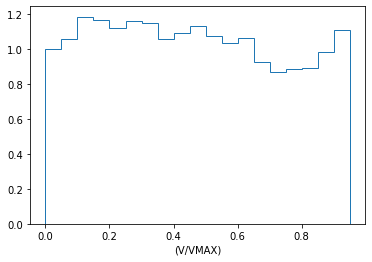

In [13]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)
pl.xlabel('(V/VMAX)')

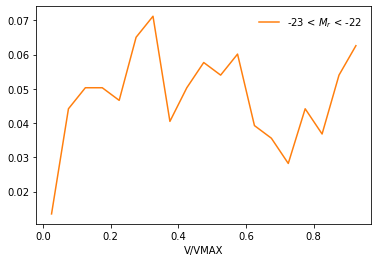

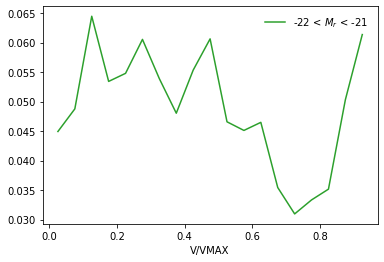

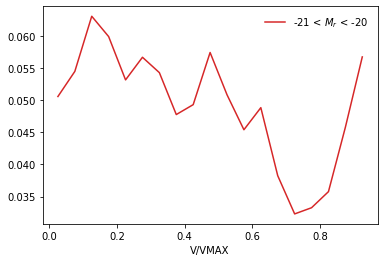

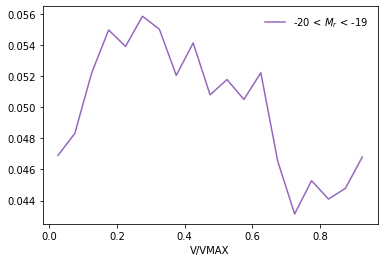

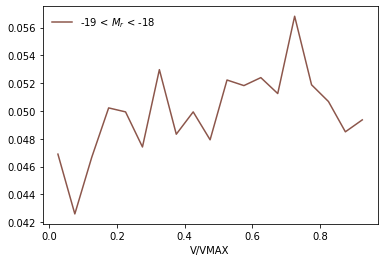

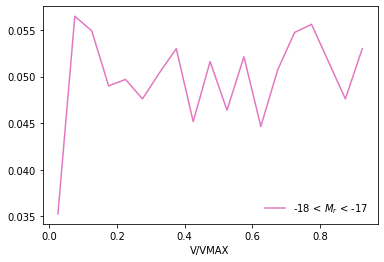

In [14]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.0, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'{:.0f} < $M_r$ < {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [15]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
185322,587725041702469675,179.83440251,-1.64817036,14.160493,0.08135,5,372775163474765824,6,17.064615,15.692654,14.905519,14.343366,14.213043,259.6079029836754,37.07158954561004,G12,-239.97727236461046,0.6935893874232879,-6.905119636685518,0.7871351,0.8222150124783408,0,5,-0.12544319185352298,-0.160523080125354,0.10303089196510218,0.18560737233721386,0.7045586438344313,0.8,-0.0789095,-0.06508,-22.935218039108076,-22.949047538591184,37.09571093614177,37.10954043562488,5.6395063,-99.0,2.0,-2.160493,0.03154120966707457,0.0
178839,587725041166581794,182.1835035,-2.07231294,14.328211,0.10734,4,G12_Y6_041_249,6,24.575645,17.823496,16.785114,15.850774,18.088587,348.95950671254064,37.71387517159247,G12,-314.6983622428863,-11.998751500068654,-11.395465440223349,1.0383816,1.0190980480456595,0,6,-0.09298329526027885,-0.07369976676785223,0.14283969236353414,0.32678700770193425,0.8544342611996858,0.8,-0.1041198,-0.085872,-23.424384233236342,-23.442632031321555,37.75259506392482,37.770842862010035,5.4717884,-99.0,2.0,-2.3282108,0.039334234229219986,0.0
125489,587724649258876969,184.17810296,-2.69967347,14.425353,0.25162,4,G12_Y4_203_103,6,15.559951,15.755173,14.309496,28.205227,16.762774,896.9591792306916,39.76386339337955,G12,-713.9407537359408,-52.154217318169536,-33.75421886554996,1.4456768,0.9922763000644923,0,6,0.11573660675273972,0.5691371102771148,0.34863479662419555,0.9652536473961288,0.829057952816934,0.8,-0.24407141,-0.201296,-25.44307373066556,-25.48584913809907,39.868426780897494,39.911202188331,5.374646,-99.0,2.0,-2.425353,0.09538586652718395,0.0
718921,587726031728017438,217.2773885,1.28502947,14.456577,0.08647,3,NED_MRK_1383,4,14.399254,14.418312,14.378856,13.8610735,14.046887,276.9712644440074,37.212173568413235,G15,-202.7981329939006,-154.36433581903054,5.717037181843526,0.039456367,0.05020904994649686,0,1,-0.0982779198530405,-0.10903060230686158,0.06300279945333358,0.018814009181763167,0.08364515776424619,2.12,-0.0838759,-0.1833164,-22.734723164844088,-22.635282672154478,37.19130046586948,37.09185997317987,5.343422,1.1327446851177603,1.0,-2.4565773,0.027777561711799695,0.0
423776,587728879796093009,137.38205797,2.9559053,14.904024,0.14906,4,G09_Y1_FX1_283,6,16.738531,15.69086,14.949677,14.424865,14.620418,498.5745074806278,38.488650344529816,G9,-318.87403319626134,293.4040460252725,22.374975832994306,0.7411823,0.6530574215121244,0,4,-0.0658698376204572,0.022255068137926215,0.15431270736417704,0.30596734437310263,0.5895276902615822,2.12,-0.1445882,-0.31600717,-23.594350725510402,-23.42293176064758,38.49837484965591,38.32695588479309,4.895975,1.0458491090380897,1.0,-2.9040241,0.03981006674260368,0.0
402898,587728308032700482,177.930413,1.9912852,15.154907,0.07667,5,579904457131714560,6,16.842907,15.722559,15.199033,14.873966,14.68127,243.84026700789565,36.935527126086086,G12,-226.1919122509048,8.173857547878793,7.869482859272214,0.5235262,0.549579180178585,0,4,-0.1197763995197219,-0.14582938798677653,0.08788865133758171,0.10089048529106931,0.5105243577579381,2.12,-0.0743699,-0.16254039,-21.7941386509326,-21.705968159773636,36.949045877495095,36.86087538633613,4.645092,0.6363

In [16]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64


# Done.